In [3]:
import numpy as np
import sys
sys.path.append('../2_compare_detectors/bhtsne-master')

hists_test = np.load("hists_test.npy")
labels_test = np.load("labels_test.npy")
hists_test = (hists_test / 255.) - 0.5
hists_train = np.load("hists_train.npy")
hists_train = (hists_train / 255.) - 0.5
labels_train = np.load("labels_train.npy")

all_data_imgs = np.concatenate((hists_train, hists_test))
all_data_labels = np.concatenate((labels_train, labels_test))

activations_all_data = np.load("activations_all_data.npy")

In [8]:
from bhtsne import run_bh_tsne
features_TSNE = run_bh_tsne(activations_all_data, 
                            verbose=True, 
                            perplexity=100,
                            max_iter=5000)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Please run this program directly from python and not from ipython or jupyter.
This is an issue due to asynchronous error handling.


In [6]:
# np.save("features_TSNE", features_TSNE) (is now perplex80 max iter 5000)

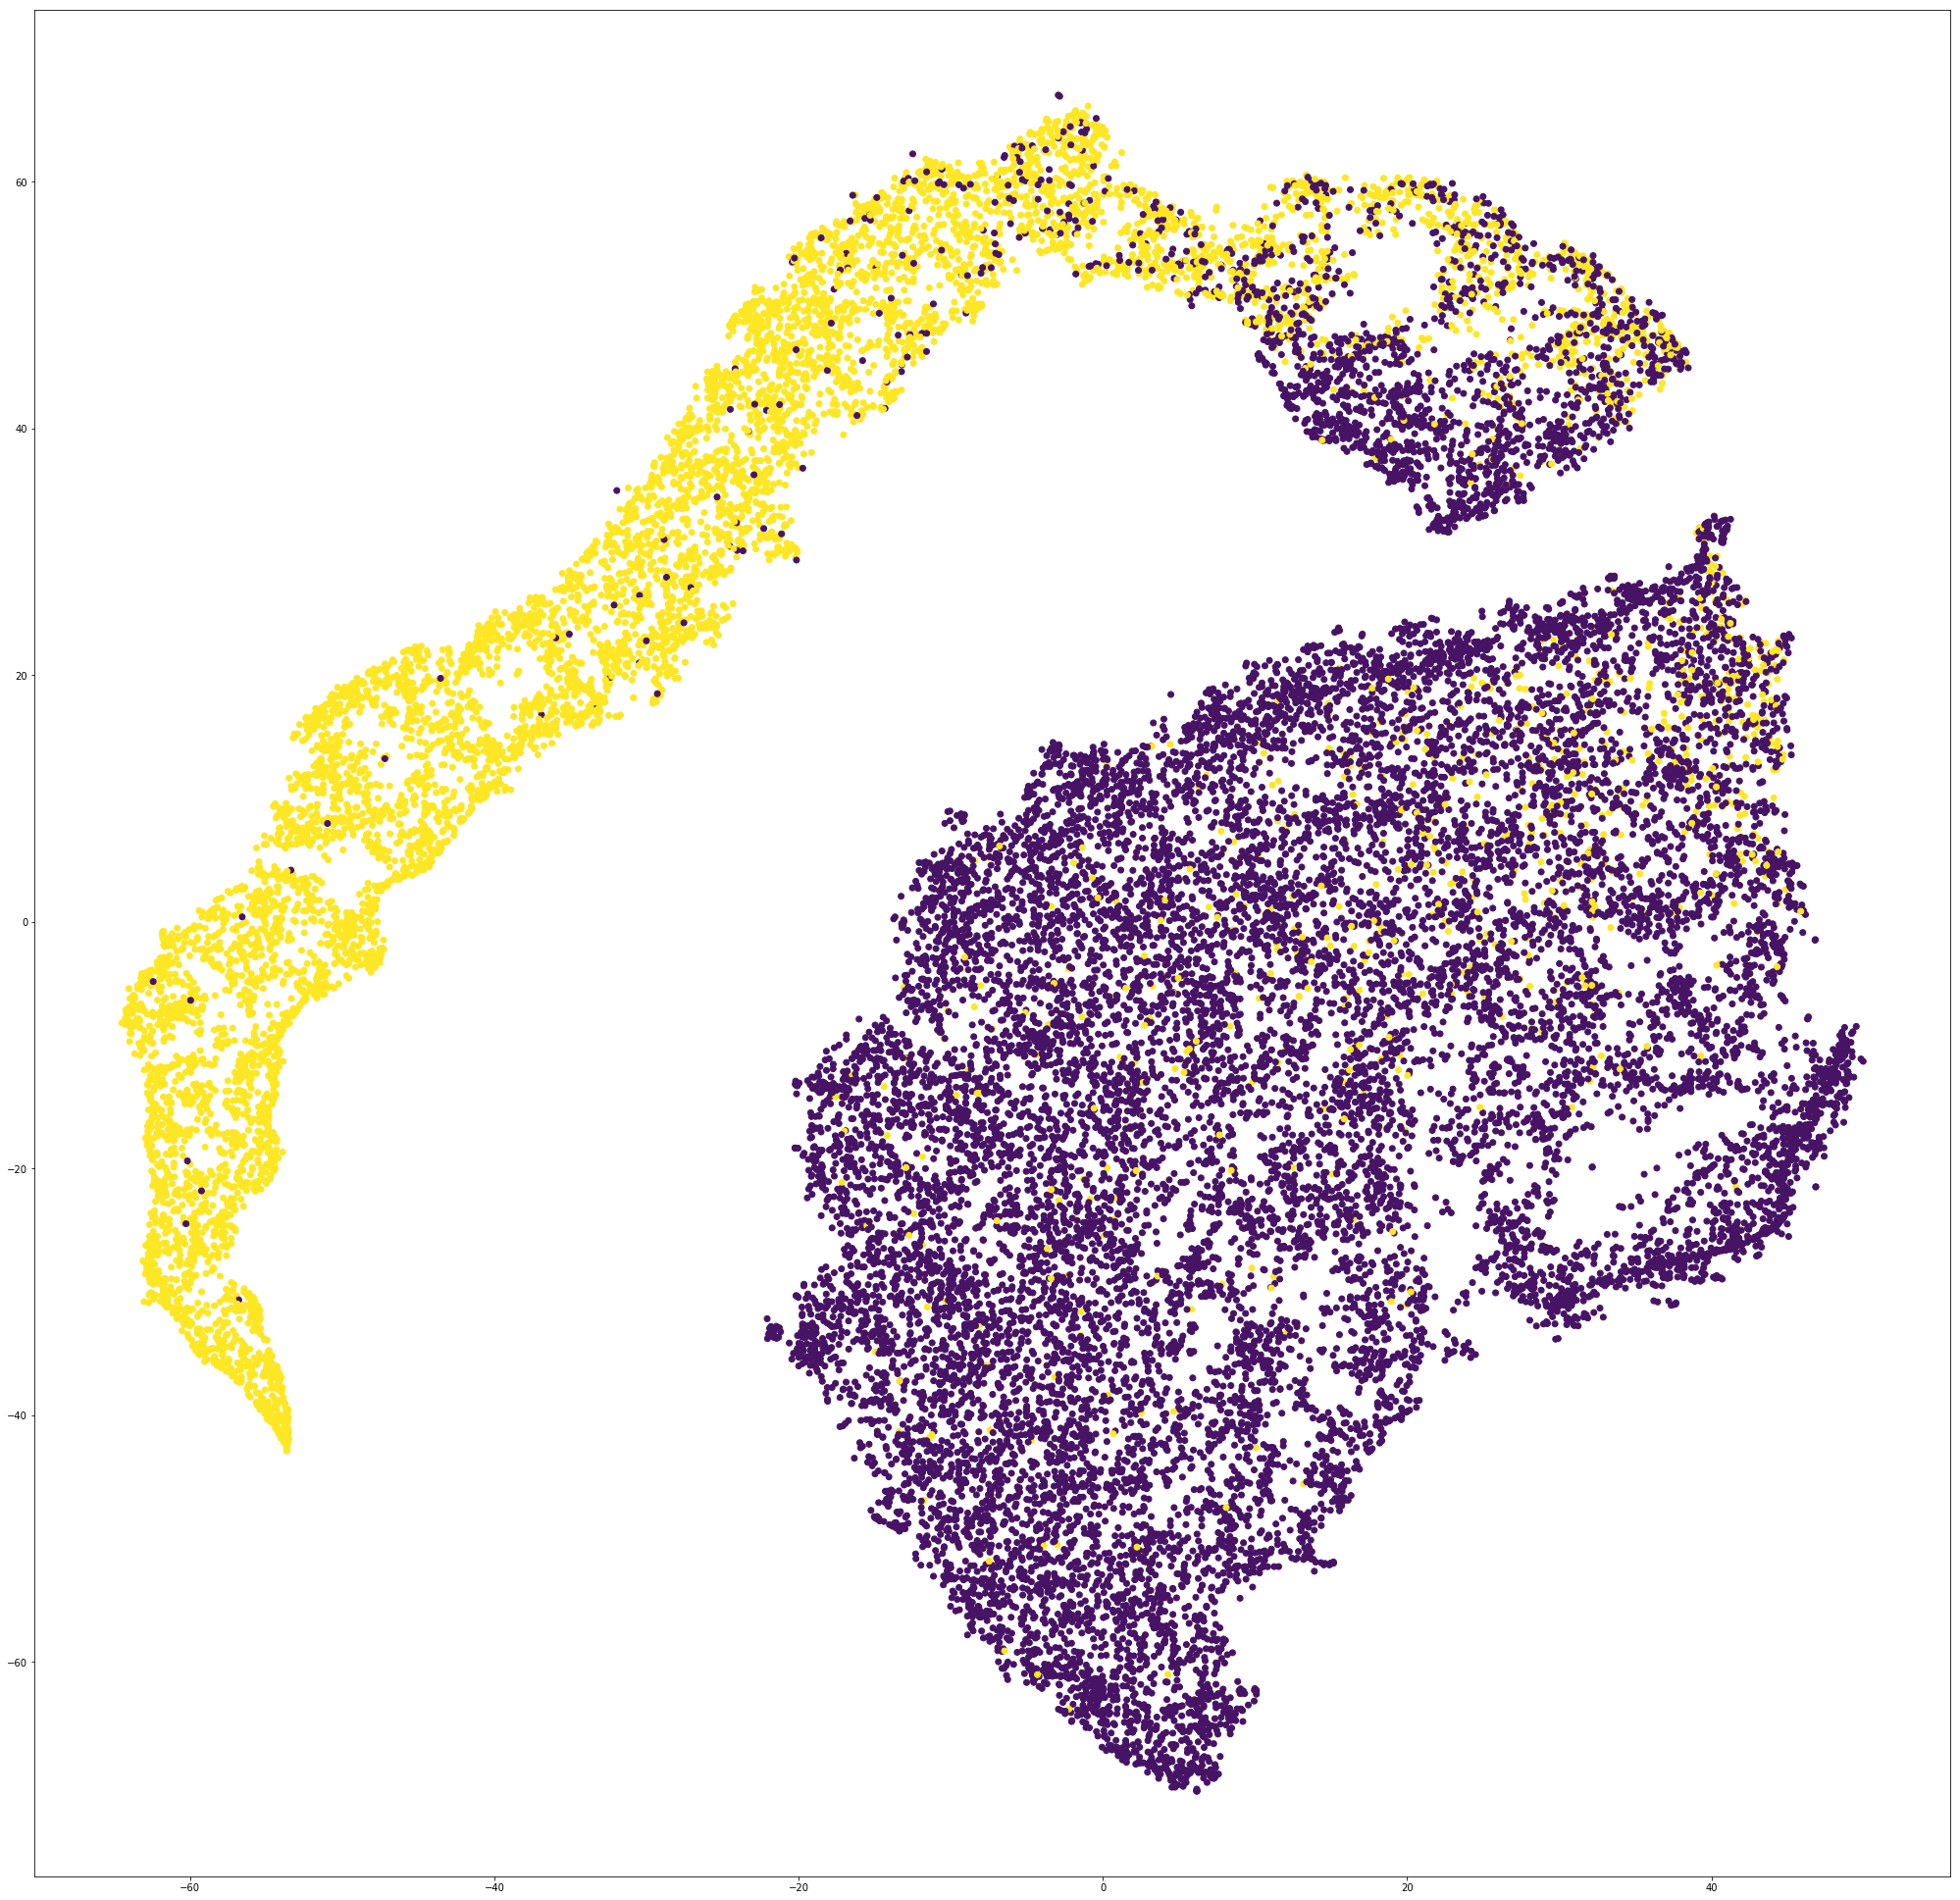

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.clf()
plt.scatter(features_TSNE[:, 0], features_TSNE[:, 1], 
            c=all_data_labels[:,0]*255, 
            cmap="viridis")
plt.clim(-0.5, 9.5)
figure = plt.gcf()  # get current figure
figure.set_size_inches(35, 35)
plt.show()

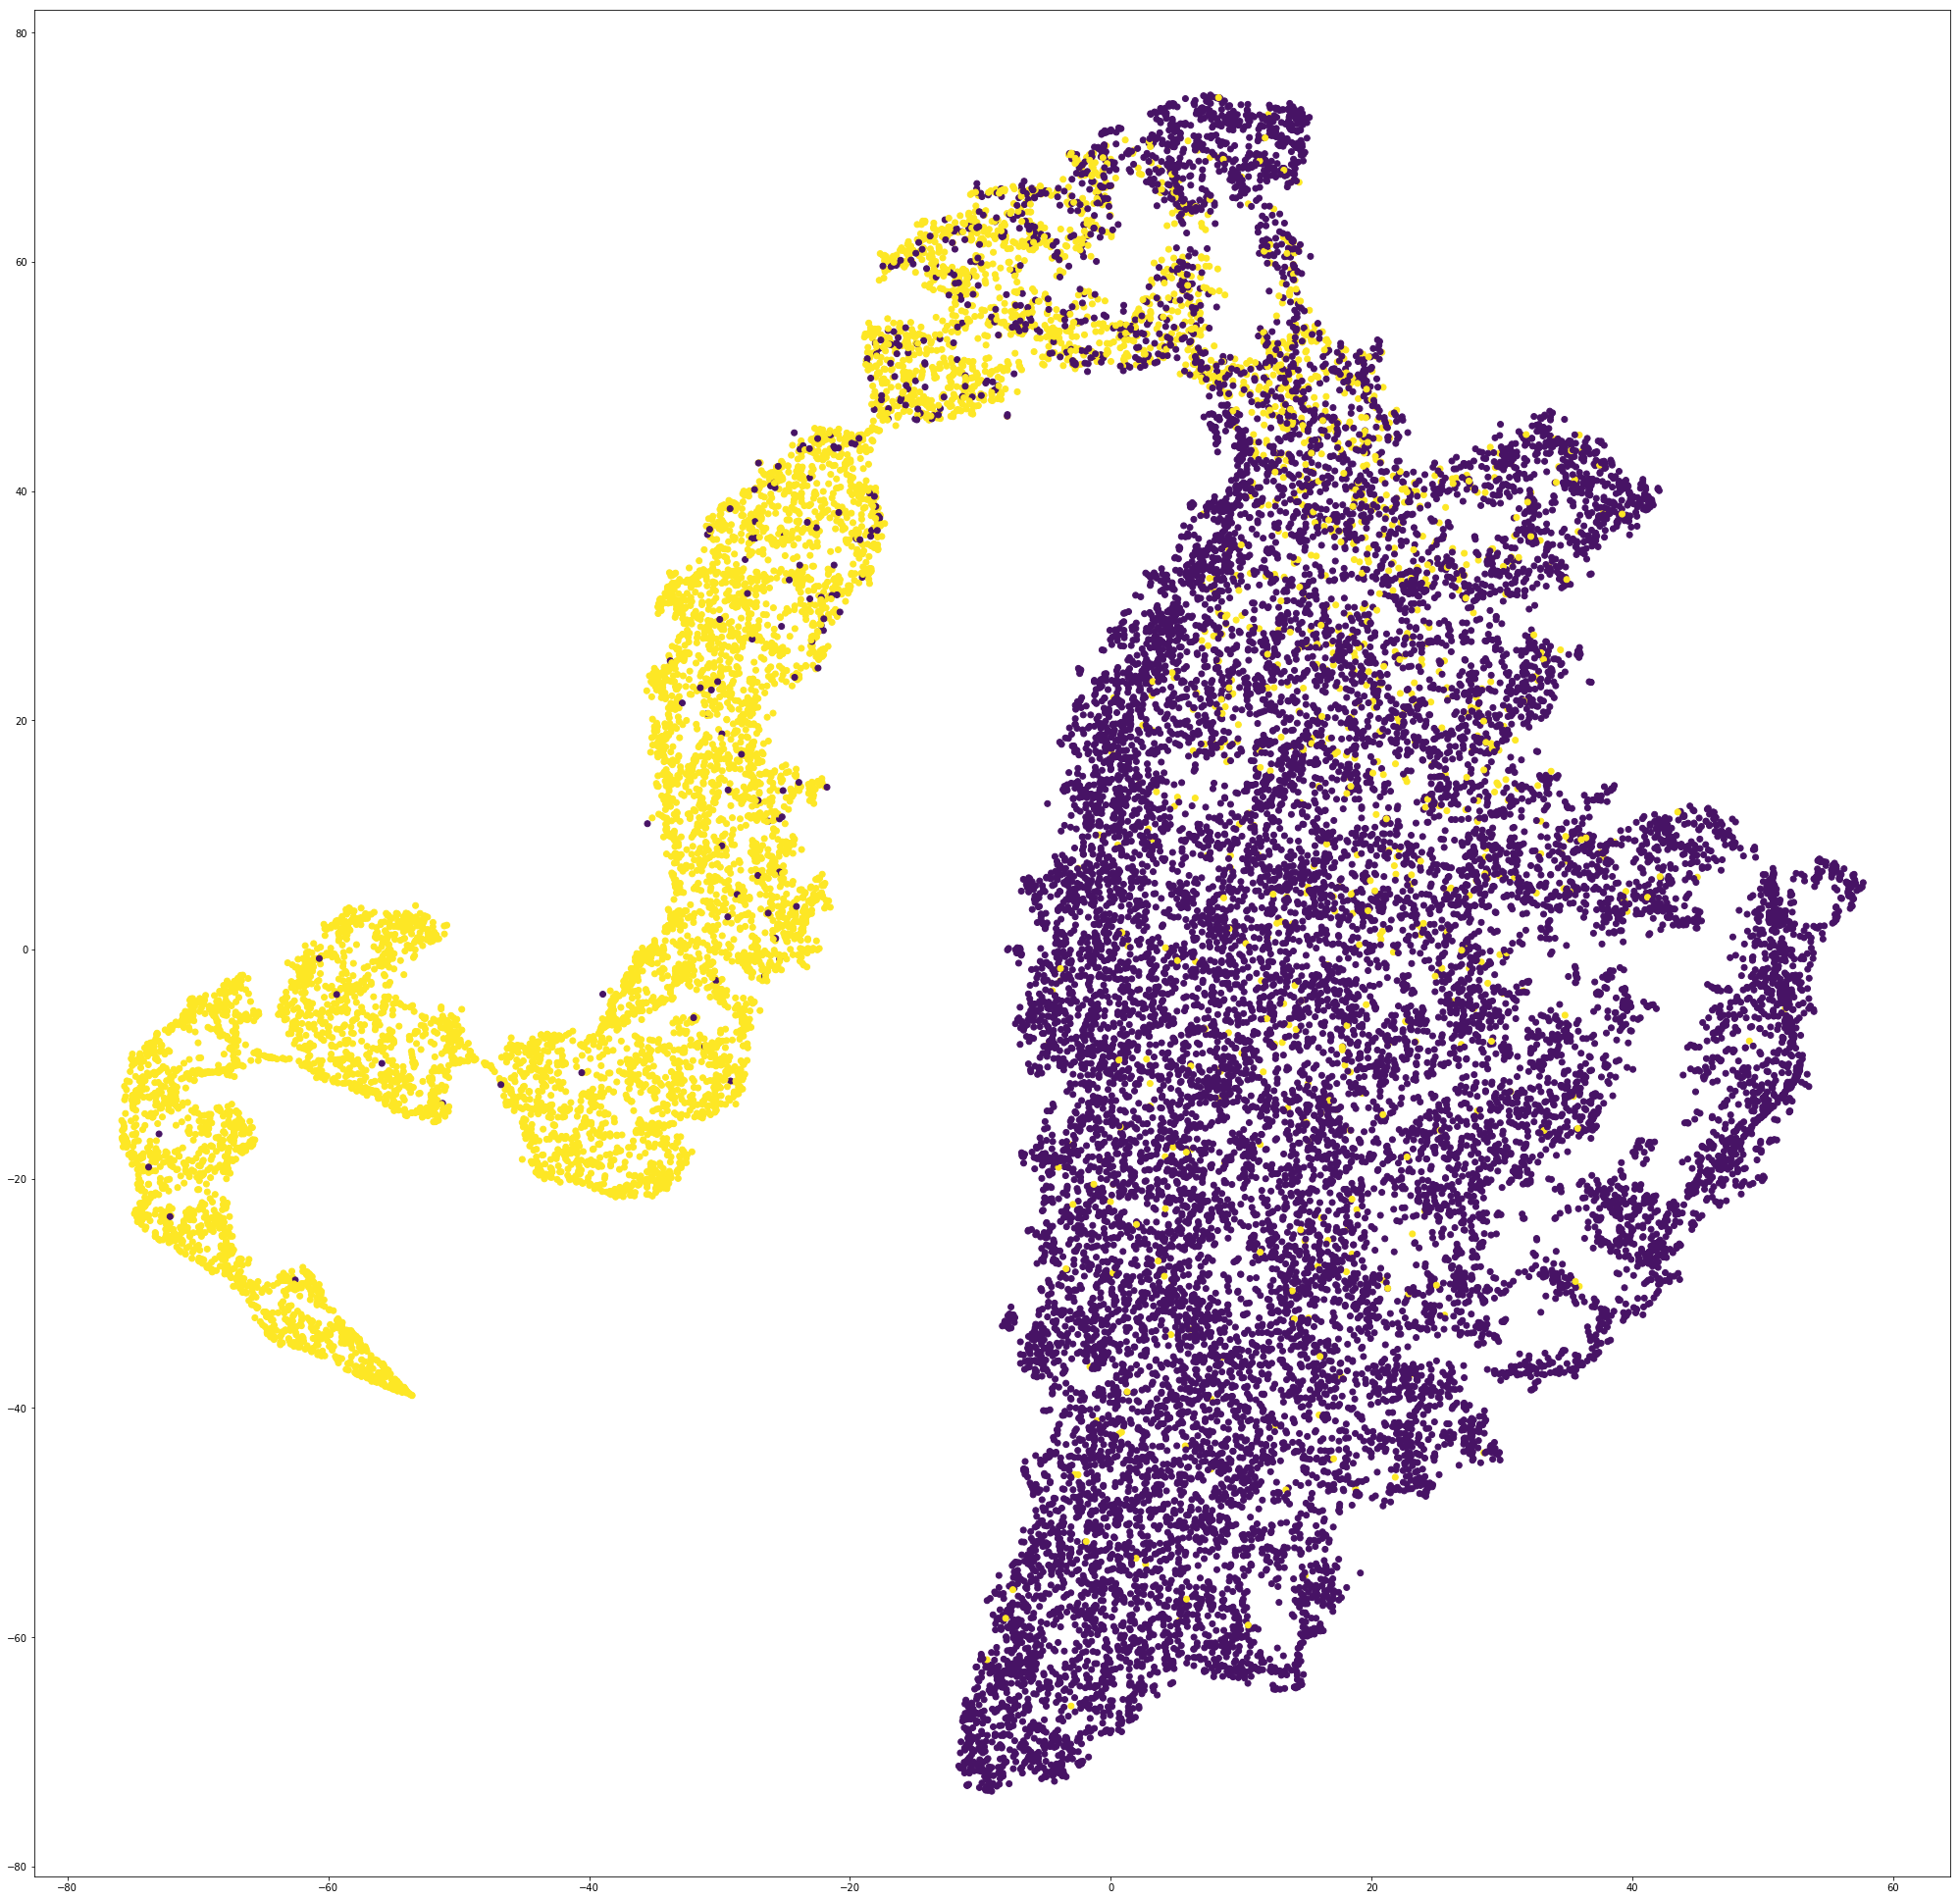

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.clf()
plt.scatter(features_TSNE[:, 0], features_TSNE[:, 1], 
            c=all_data_labels[:,0]*255, 
            cmap="viridis")
plt.clim(-0.5, 9.5)
figure = plt.gcf()  # get current figure
figure.set_size_inches(35, 35)
plt.show()

In [ ]:
all_data_imgs_rgb = (all_data_imgs + 0.5) * 255
for i in range(len(all_data_imgs_rgb)):
    all_data_imgs_rgb[i] = cv2.cvtColor(all_data_imgs_rgb[i].astype(np.float32), 
                                        cv2.COLOR_BGR2RGB)

# create a border around images for labelling in scatter plot
all_data_imgs_rgb_borders = all_data_imgs_rgb.copy()
for i, image in enumerate(all_data_imgs_rgb):
    image = min_resize(image, 64 - 5 * 2)
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, 
                               cv2.BORDER_CONSTANT, 
                               value=(255,255,255))

    b = 5 - 1
    if all_data_labels[:,0][i] == 1:
        all_data_imgs_rgb_borders[i] = cv2.copyMakeBorder(image, b, b, b, b, 
                                                          cv2.BORDER_CONSTANT, 
                                                          value=(19,215,52)) 
    else:
        all_data_imgs_rgb_borders[i] = cv2.copyMakeBorder(image, b, b, b, b, 
                                                          cv2.BORDER_CONSTANT, 
                                                          value=(245,219,10)) 

all_data_imgs_rgb_borders = all_data_imgs_rgb_borders.astype(np.uint8)

In [ ]:
img = image_scatter(features_TSNE, all_data_imgs_rgb_borders, 
                    scatter_size=21000, 
                    img_size=64)
img2 = cv2.cvtColor(img.astype(np.float32), 
                        cv2.COLOR_BGR2RGB)
cv2.imwrite("tsne_test5.png", img2.astype(np.uint8))